# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [131]:
sat = pd.read_csv('./sat.csv')
act = pd.read_csv('./act.csv')

##### 2. Print the first ten rows of each dataframe.

In [132]:
sat = sat.drop(['Unnamed: 0'], axis=1)

In [133]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [134]:
act = act.drop(['Unnamed: 0'], axis=1)

In [135]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

In [136]:
# state is the state 
# participation is is the percent of eligiable people in that took the test
# average score for english section
# average score for math section
# average score for reading section
# average score for science section
# average score for composite section

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [137]:
act.isnull().sum() # no values for either null or na - dataset looks complete 

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [138]:
sat.isnull().sum() # no values for either null or na - dataset looks complete

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

##### 5. Print the types of each column.

In [139]:
print(np.dtype(act["State"]))
print(np.dtype(act["Participation"]))
print(np.dtype(act["English"]))
print(np.dtype(act["Math"]))
print(np.dtype(act["Reading"]))
print(np.dtype(act["Science"]))
print(np.dtype(act["Composite"]))

object
object
float64
float64
float64
float64
float64


In [140]:
print(np.dtype(sat["State"]))
print(np.dtype(sat["Participation"]))
print(np.dtype(sat["Evidence-Based Reading and Writing"]))
print(np.dtype(sat["Math"]))
print(np.dtype(sat["Total"]))
#State	Participation	Evidence-Based Reading and Writing	Math	Total

object
object
int64
int64
int64


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [141]:
#participation should be a float
#act1 = act['Participation'].to_replace('%', '')
act['Participation'] = act['Participation'].map(lambda dis_cell: float(dis_cell.replace('%','')))

In [142]:
act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [143]:
sat['Participation'] = sat['Participation'].map(lambda dis_cell: float(dis_cell.replace('%','')))

In [144]:
sat.head().dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [145]:
sat_math = {}
for i in sat:
    sat_math = dict(zip(sat['State'],sat['Math']))

In [146]:
sat_Evidence_Based_Reading_Writing = {}
for i in sat:
    sat_Evidence_Based_Reading_Writing = dict(zip(sat['State'],sat['Evidence-Based Reading and Writing']))

In [147]:
sat_total = {}
for i in sat:
    sat_total = dict(zip(sat['State'],sat['Total']))

In [148]:
#sat['Total'].value_counts()

In [149]:
act.head().dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [150]:
act_english = {}
for i in act:
    act_english = dict(zip(act['State'],act['English']))

In [151]:
act_math = {}
for i in act:
    act_math = dict(zip(act['State'],act['Math']))

In [152]:
act_reading = {}
for i in act:
    act_reading = dict(zip(act['State'],act['Reading']))

In [153]:
act_science = {}
for i in act:
    act_science = dict(zip(act['State'],act['Science']))

In [154]:
act_composite = {}
for i in act:
    act_composite = dict(zip(act['State'],act['Composite']))

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [155]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [156]:
new_dict = {}
for c in act.columns:
    new_dict.update({c: act[c]})

#act one


In [157]:
new_dicts = {}
for c in sat.columns:
    new_dicts.update({c: sat[c]})

#sat one

##### 9. Merge the dataframes on the state column.

In [158]:
act['Math'].min()

18.0

In [159]:
 combined = pd.merge(act,sat, on='State')

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [160]:
combined

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017


In [161]:
combined.rename(index=str, columns={"Participation_x": "Part_ACT", "Math_x": "Math_ACT", 
                                    "Participation_y": "Part_SAT", "Math_y": "Math_SAT",
                                   "Evidence-Based Reading and Writing": "EBRW"}, inplace = True)


In [162]:
combined['Math_SAT'][20] = 524
combined['Science'][20] = 23.2

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [163]:
combined_2 = combined

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [164]:
print(combined.min(numeric_only = True))
print(combined.max(numeric_only = True))

Part_ACT       8.0
English       16.3
Math_ACT      18.0
Reading       18.1
Science       18.2
Composite     17.8
Part_SAT       2.0
EBRW         482.0
Math_SAT     468.0
Total        950.0
dtype: float64
Part_ACT      100.0
English        25.5
Math_ACT       25.3
Reading        26.0
Science        24.9
Composite      25.5
Part_SAT      100.0
EBRW          644.0
Math_SAT      651.0
Total        1295.0
dtype: float64


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [165]:
[(sum((combined['Part_ACT'] - combined['Part_ACT'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['Part_ACT']]

[31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751231806,
 31.824175751

In [166]:
sd = []
#[(sum((combined.colums() - combined.colums().sum()/len(combined.colums()))**2)/len(combined.colums()))**.5 for i in combined.colums()]
#print([list(combined['Part_ACT']) for i in combined['Part_ACT']])

In [167]:
[(sum((combined['English'] - combined['English'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['English']]


[2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369363363,
 2.3304876369

In [168]:
[(sum((combined['Math_ACT'] - combined['Math_ACT'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['Math_ACT']]

[1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273436781,
 1.9624620273

In [169]:
[(sum((combined['Reading'] - combined['Reading'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['Reading']]

[2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314842646,
 2.0469029314

In [170]:
[(sum((combined['Science'] - combined['Science'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['Science']]

[1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451443676,
 1.7222161451

In [171]:
[(sum((combined['Composite'] - combined['Composite'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['Composite']]

[2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,
 2.000786081581989,


In [172]:
[(sum((combined['Part_SAT'] - combined['Part_SAT'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['Part_SAT']]

[34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,


In [173]:
[(sum((combined['EBRW'] - combined['EBRW'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['EBRW']]

[45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,
 45.21697020437866,


In [174]:
[(sum((combined['Math_SAT'] - combined['Math_SAT'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['Math_SAT']]

[46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,
 46.65713364485503,


In [175]:
[(sum((combined['Total'] - combined['Total'].sum()/len(combined))**2)/len(combined))**.5 for i in combined['Total']]

[91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,
 91.58351056778743,


In [176]:
sd = [31.824175751231806, 2.3304876369363363, 1.9624620273436781, 2.0469029314842646, 3.151107895464408, 2.000786081581989, 34.92907076664508, 45.21697020437866, 84.07255521608297, 91.58351056778743] 

In [177]:
len(sd)

10

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [178]:
combined.loc[51] = ['StDev', 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 3.151107895464408,
 2.000786081581989,
 34.92907076664508,
 45.21697020437866,
 84.07255521608297,
 91.58351056778743]

In [179]:
combined
combined_2 = combined.drop(combined.index[51])

In [180]:
combined_2

,State,Part_ACT,English,Math_ACT,Reading,Science,Composite,Part_SAT,EBRW,Math_SAT,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,1201.0
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [181]:
combined.sort_values("Part_SAT", ascending=False, inplace=True)

##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [182]:
high_act = combined['Composite'] > 20

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

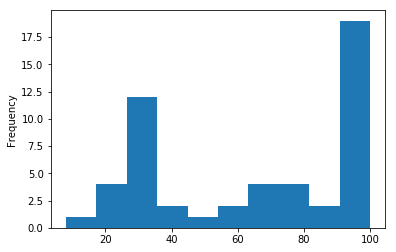

In [183]:
combined_2['Part_ACT'].plot(kind='hist')

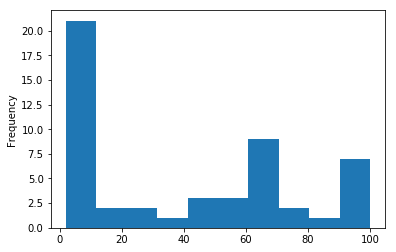

In [184]:
combined_2['Part_SAT'].plot(kind='hist')

##### 17. Plot the Math(s) distributions from both data sets.

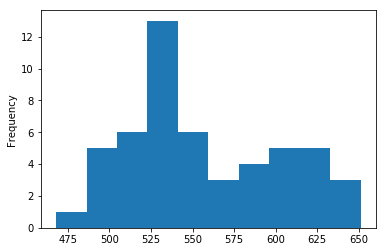

In [185]:
combined_2['Math_SAT'].plot(kind='hist')
# the math act seams to have a bimodal distrbution. Some states fell into the better distribution, where others 
# fell into a worse one. There is a large amount of mediocre scores. 

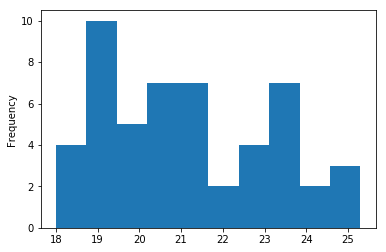

In [186]:
combined_2['Math_ACT'].plot(kind='hist')
#math act seems like it is skewed right, where more states did worse, and only a few states did well. 

##### 18. Plot the Verbal distributions from both data sets.

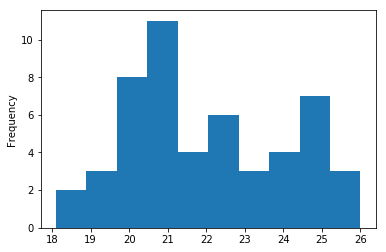

In [187]:
combined_2['Reading'].plot(kind='hist')
#For reading there is a high number of low-medium scores, and again a few high scores. 

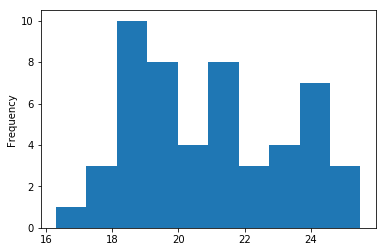

In [188]:
combined_2['English'].plot(kind='hist')
#This distribution has many high points at different scores. Perhaps there were states with less
# english spoken. 

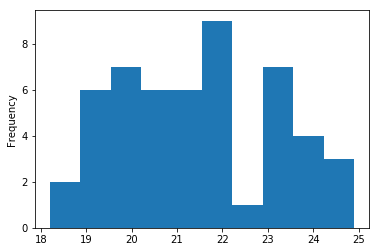

In [189]:
combined_2['Science'].plot(kind='hist')
#with the exception of 22, this seems to be the closest to a normally distrubted data set with the high point right around the mean. 

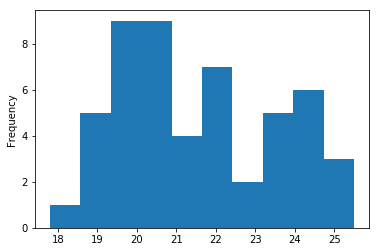

In [190]:
combined_2['Composite'].plot(kind='hist')
#the composite is skewed right for the act. There are few states with high scores, and many with lower scores. 

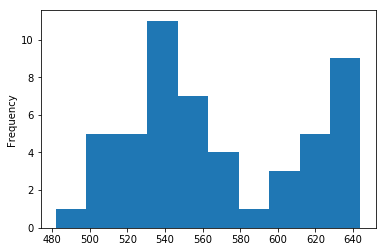

In [191]:
combined_2['EBRW'].plot(kind='hist')
#the reason comprehension on the SAT seems to also be bimodal, with most states in a mediocre score range,
#and a few states with really high scores. 

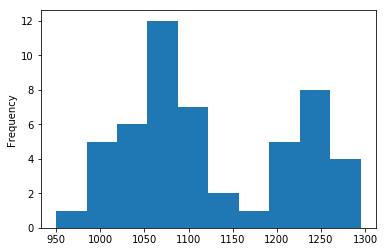

In [192]:
combined_2['Total'].plot(kind='hist')
#the sat total looks alot like the EBRW graph, in that some states have high scores, but most have lower scores. 

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [193]:
#the data is normally distributed

##### 20. Does this assumption hold true for any of our columns? Which?

In [194]:
# these distributions are not normally distributed. 

##### 21. Plot some scatterplots examining relationships between all variables.

In [195]:
import seaborn as sns

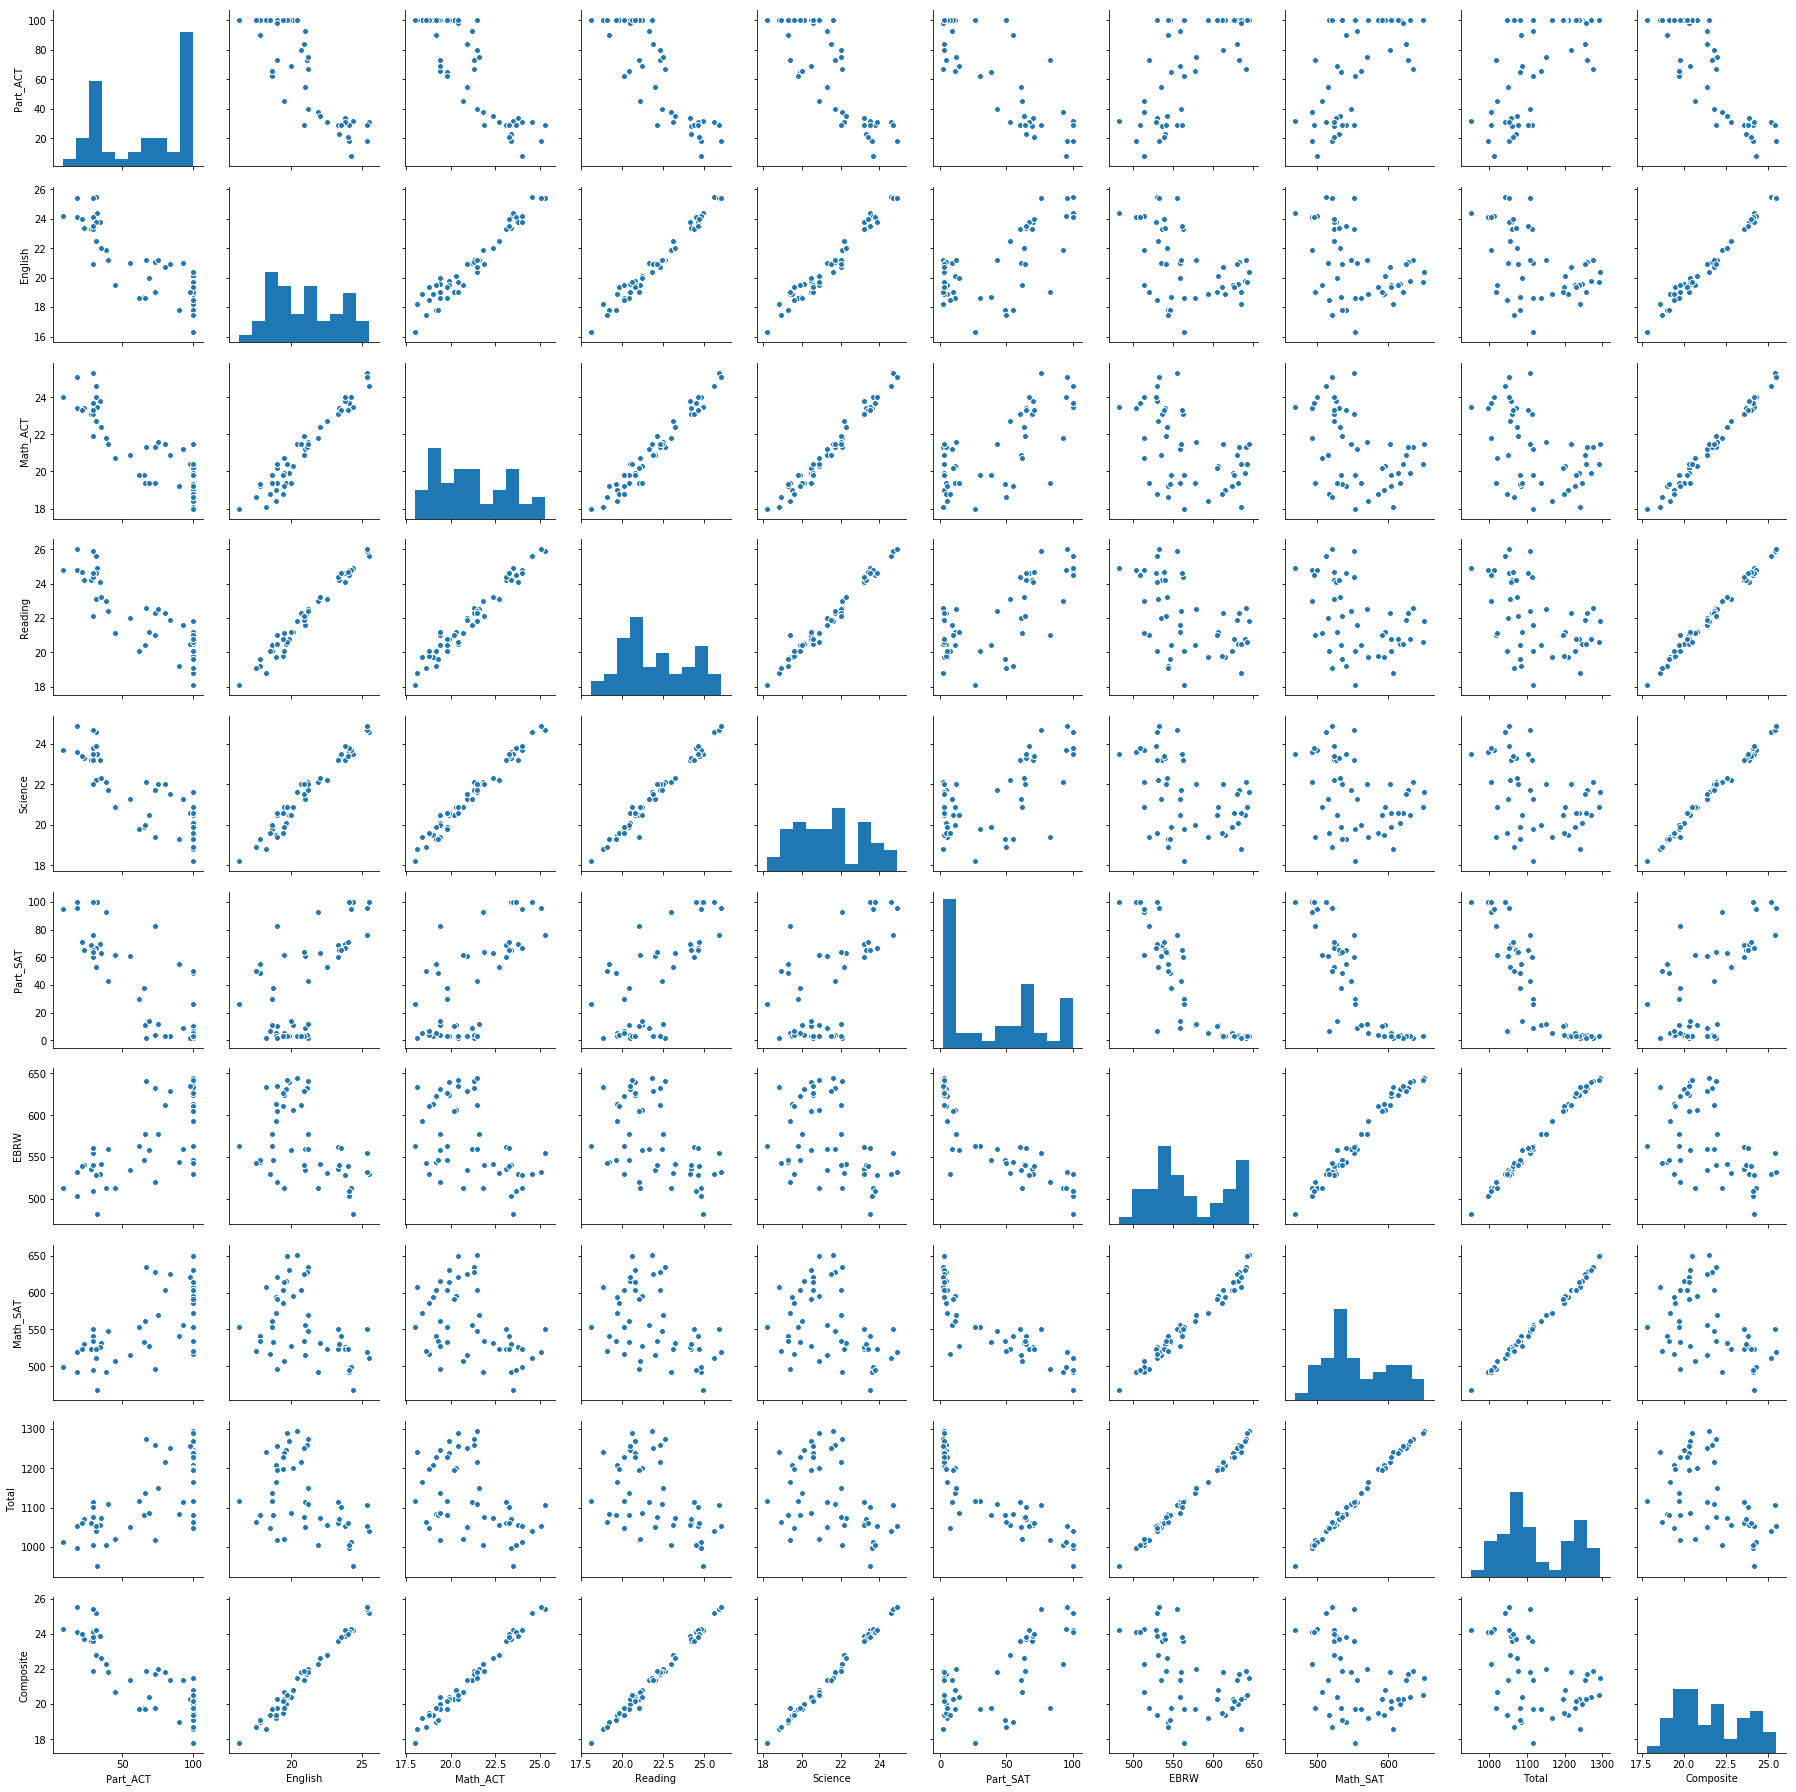

In [196]:
sns.pairplot(combined_2[['Part_ACT', 'English', 'Math_ACT', 'Reading', 'Science', 'Part_SAT', 'EBRW', 'Math_SAT', 'Total', 'Composite']], kind = 'scatter')

##### 22. Are there any interesting relationships to note?

In [197]:
# everything looks fairly like it should

##### 23. Create box plots for each variable. 

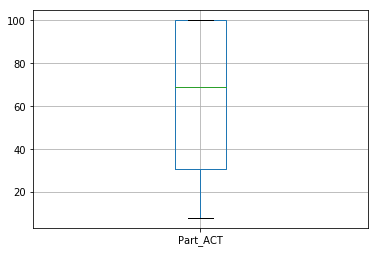

In [198]:
combined_2.boxplot('Part_ACT');

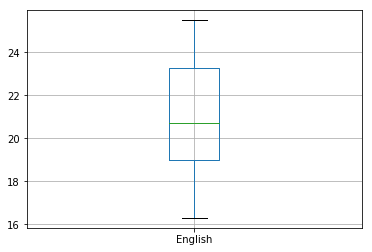

In [199]:
combined_2.boxplot('English');

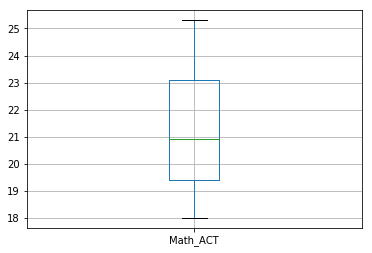

In [200]:
combined_2.boxplot('Math_ACT');

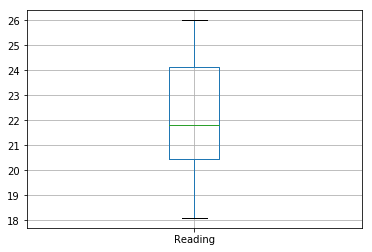

In [201]:
combined_2.boxplot('Reading');

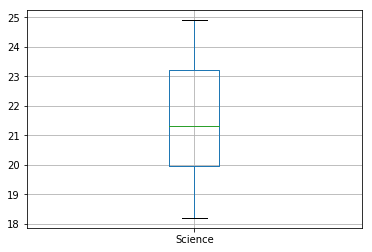

In [202]:
combined_2.boxplot('Science');

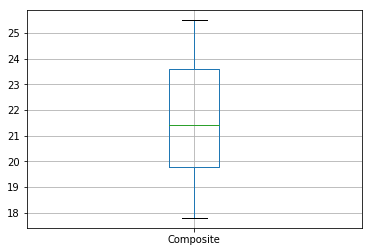

In [203]:
combined_2.boxplot('Composite');

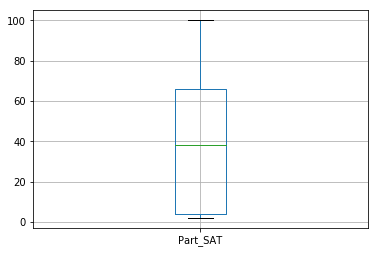

In [204]:
combined_2.boxplot('Part_SAT');

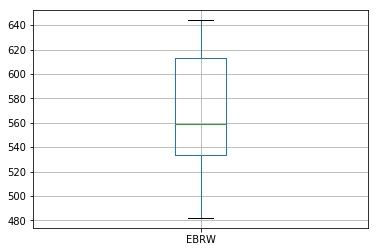

In [205]:
combined_2.boxplot('EBRW');

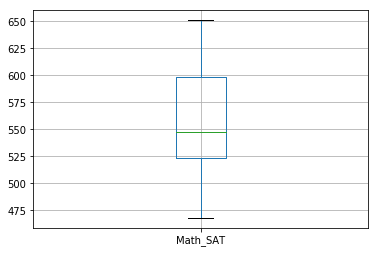

In [206]:
combined_2.boxplot('Math_SAT');

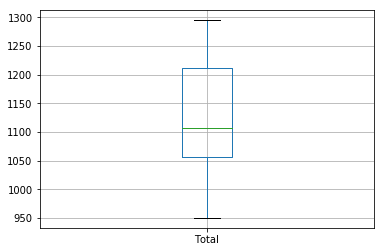

In [207]:
combined_2.boxplot('Total');

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [208]:
#these are described in the individual graphs. 

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [209]:
#Participation rate of the ACT (First row on the left) has a slight positive relationship with math scores and EBRW,
#but has a negative relationship with participation in SAT, Science, Reading, Math, and English.

#English (ACT), has little relationship with the SAT subjects. However, it is positivly related with the other
#act subjects.

#Math_ACT has similar relationships as english. Very strong positive relationships with the other subjects of the
#ACT, but not as high as others. 

#Reading and science are both positively related to the other ACT subjects, and have little relationship with SAT subjects

#The SAT subjects all have a strong positive relationship with themselves, like the ACT subjects. 
#there are not a relationship between the different tests, which makes sense. 

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [210]:
# H0, there is no difference in the means for SAT participation rates or ACT participation rates
# HA, there is a difference in the means for SAT participation rates or ACT participation rates 

In [211]:
import scipy.stats as stats

In [212]:
result = stats.ttest_ind(combined_2['Part_SAT'], combined_2['Part_ACT'])
result
t_stat = -3.8085778908170544

In [213]:
result

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

In [214]:
n_ACT = len(combined_2['Part_ACT'])
n_SAT = len(combined_2['Part_SAT'])
# This cell is for calculating the upper and lower tail
lower_tail = stats.t.cdf(-abs(t_stat), n_ACT+n_SAT-2)
upper_tail = 1.0 - stats.t.cdf(abs(t_stat), n_ACT+n_SAT-2)

In [215]:
lower_tail
upper_tail

0.00012067101849333461

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [216]:
se = (((combined_2['Part_ACT'].std()/len(combined_2['Part_ACT']))+((combined_2['Part_SAT'].std()/len(combined_2['Part_SAT'])))))**.5

In [217]:
se

1.149743997813357

In [218]:
(combined_2['Part_ACT'].mean() - combined_2['Part_SAT'].mean()) - t_stat*se

29.82986996232842

In [219]:
mean_of_sample_means = np.mean(combined_2['Part_ACT'])
standard_error_of_mean = np.std(combined_2['Part_ACT'])/np.sqrt(len(combined_2['Part_ACT']))
critical_z = stats.norm.ppf(q = 0.975) #because we are using 2.5 on either side to get .95

margin_of_error = standard_error_of_mean * critical_z
lower_man = mean_of_sample_means - margin_of_error
upper_man = mean_of_sample_means + margin_of_error

In [220]:
print(lower_man)
print(upper_man)

56.5207615945811
73.98904232698752


In [221]:
mean_of_sample_means = np.mean(combined_2['Part_SAT'])
standard_error_of_mean = np.std(combined_2['Part_SAT'])/np.sqrt(len(combined_2['Part_SAT']))
critical_z = stats.norm.ppf(q = 0.975) #because we are using 2.5 on either side to get .95

margin_of_error = standard_error_of_mean * critical_z
lower_man = mean_of_sample_means - margin_of_error
upper_man = mean_of_sample_means + margin_of_error

In [222]:
print(lower_man)
print(upper_man)

30.217643220943465
49.39019991631144


In [223]:
# a>p, so we can reject the null hypothesis

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [224]:
#no, p value is really small, and the confidence intervals do not overlap

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [225]:
#not unless there was some way of putting them in the same units, but currently they are out of different scales.
#you could do it on a percentile basis, given that data. 

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [226]:
# there are not too many data points, so you can use the entirety of the data. 